In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def getIterationDate(data_name,result_name):
    #from V2GSim
    # myresult=pd.read_csv('../data/vehicle/VehiclesCap_V2G_'+data_name+'.csv',header=0)
    # N = 6# from 10mins to 1 hour
    # myresult=myresult.groupby(myresult.index // N).sum()/6# from the unit of W to kW
    # myresult=myresult.rename(columns={'EnergyDemand':'netload','EnergyGeneration':'gen_capacity_veh','Regup':'regup_capacity_veh','Regdown':'regdown_capacity_veh'})
    #from UCED
    if result_name=='netload':
        myresult=pd.read_csv('../data/vehicle/VehiclesCap_V2G_'+data_name+'.csv',header=0)
        N = 6# from 10mins to 1 hour
        myresult=myresult.groupby(myresult.index // N).sum()/6# from the unit of W to kW
        myresult=myresult.rename(columns={'EnergyDemand':'netload','EnergyGeneration':'gen_capacity_veh','Regup':'regup_capacity_veh','Regdown':'regdown_capacity_veh'})
        return pd.DataFrame(data=myresult[result_name])
    else:
        VehCap=pd.read_csv('../data/vehicle/VehiclesCap_'+data_name+'.csv',header=0)
        return pd.DataFrame(data=VehCap[result_name])

def plotResult():
    
    sns.set()
    sns.set_style("whitegrid")
    sns.color_palette("Set2")
    plt.title('demandCost')
    sns.lineplot(data=demandCost,dashes=False).get_figure().savefig("Figure/demandCost.png")
    plt.show()
    
    sns.color_palette("Set2")
    plt.title('demand')
    sns.lineplot(data=demand,dashes=False).get_figure().savefig("Figure/demand.png")
    plt.show()

    sns.color_palette("Set2")
    plt.title('generationRev')
    sns.lineplot(data=generationRev,dashes=False).get_figure().savefig("Figure/generationRev.png")
    plt.show()

    sns.color_palette("Set2")
    plt.title('generation')
    sns.lineplot(data=generation,dashes=False).get_figure().savefig("Figure/generation.png")
    plt.show()

    plt.title('regupRev')
    sns.lineplot(data=regupRev[1:],dashes=False).get_figure().savefig("Figure/regupRev.png")
    plt.show()

    sns.color_palette("Set2")
    plt.title('regup')
    sns.lineplot(data=regup.drop(columns=['iteration1']),dashes=False).get_figure().savefig("Figure/regup.png")
    plt.show()

    plt.title('regdownRev')
    sns.lineplot(data=regdownRev,dashes=False).get_figure().savefig("Figure/regdownRev.png")
    plt.show()

    sns.color_palette("Set2")
    plt.title('regdown')
    sns.lineplot(data=regdown,dashes=False).get_figure().savefig("Figure/regdown.png")
    plt.show()

    total=generationRev+regupRev+regdownRev-demandCost
    plt.title('totalRev')
    sns.lineplot(data=total,dashes=False).get_figure().savefig("Figure/totalRev.png")
    plt.show()

def getResult(iteraNumber):
    for i in range(iteraNumber):
        if i ==0:
            demandCost=[]
            generationRev=[]
            regupRev=[]
            regdownRev=[]
        # first iteration
            data_name='iteration1_version3_regupregdown20' # from V2GSIM vehicle cap
            data_name2='iteration2_version4_regupregdown20'
        # from V2GSim
            # demand=getIterationDate(data_name,'netload').rename(columns={'netload':'iteration'+str(i+1)})
            # generation=getIterationDate(data_name,'gen_capacity_veh').rename(columns={'gen_capacity_veh':'iteration'+str(i+1)})
            # regup=getIterationDate(data_name,'regup_capacity_veh').rename(columns={'regup_capacity_veh':'iteration'+str(i+1)})
            # regdown=getIterationDate(data_name,'regdown_capacity_veh').rename(columns={'regdown_capacity_veh':'iteration'+str(i+1)})
        #from UCED
            demand=getIterationDate(data_name,'netload').rename(columns={'netload':'iteration'+str(i+1)})
            generation=getIterationDate(data_name2,'gen_capacity_veh').rename(columns={'gen_capacity_veh':'iteration'+str(i+1)})
            regup=getIterationDate(data_name2,'regup_capacity_veh').rename(columns={'regup_capacity_veh':'iteration'+str(i+1)})
            regdown=getIterationDate(data_name2,'regdown_capacity_veh').rename(columns={'regdown_capacity_veh':'iteration'+str(i+1)})

            pr=pd.read_csv('../data/price/price'+data_name2+'.csv',header=0)[:24]
            demandCost=np.asarray(demand['iteration1']*pr['pr_e']).sum()
            generationRev=np.asarray(generation['iteration1']*pr['pr_e']).sum()
            regupRev=np.asarray(regup['iteration1']*pr['pr_fre_u']).sum()
            regdownRev=np.asarray(regdown['iteration1']*pr['pr_fre_d']).sum()

        else: #start from i=1,iteration 3
            data_name='iteration'+str(i*2+1)+'_version4_regupregdown20' # from V2GSIM vehicle cap
            data_name2='iteration'+str(i*2+2)+'_version4_regupregdown20'
            pr=pd.read_csv('../data/price/price'+data_name2+'.csv',header=0)[:24]
            # from V2GSim
            # demand2=getIterationDate(data_name,'netload')
            # demand['iteration'+str(i+1)]=demand2
            # # print(np.asarray(demand['iteration'+str(i+1)]*pr['pr_e']).sum())
            # demandCost=np.append(demandCost,np.asarray(demand['iteration'+str(i+1)]*pr['pr_e']).sum())

            # generation2=getIterationDate(data_name,'gen_capacity_veh')
            # generation['iteration'+str(i+1)]= generation2
            # generationRev=np.append(generationRev,np.asarray(generation['iteration'+str(i+1)]*pr['pr_e']).sum())

            # regup2=getIterationDate(data_name,'regup_capacity_veh')
            # regup['iteration'+str(i+1)]= regup2
            # regupRev=np.append(regupRev,np.asarray(regup['iteration'+str(i+1)]*pr['pr_fre_u']).sum())

            # regdown2=getIterationDate(data_name,'regdown_capacity_veh')
            # regdown['iteration'+str(i+1)]= regdown2
            # regdownRev=np.append(regdownRev,np.asarray(regdown['iteration'+str(i+1)]*pr['pr_fre_d']).sum())

            # from UCED
            demand2=getIterationDate(data_name,'netload')
            demand['iteration'+str(i+1)]=demand2
            # print(np.asarray(demand['iteration'+str(i+1)]*pr['pr_e']).sum())
            demandCost=np.append(demandCost,np.asarray(demand['iteration'+str(i+1)]*pr['pr_e']).sum())

            generation2=getIterationDate(data_name2,'gen_capacity_veh')
            generation['iteration'+str(i+1)]= generation2       
            generationRev=np.append(generationRev,np.asarray(generation['iteration'+str(i+1)]*pr['pr_e']).sum())

            regup2=getIterationDate(data_name2,'regup_capacity_veh')
            regup['iteration'+str(i+1)]= regup2
            regupRev=np.append(regupRev,np.asarray(regup['iteration'+str(i+1)]*pr['pr_fre_u']).sum())

            regdown2=getIterationDate(data_name2,'regdown_capacity_veh')
            regdown['iteration'+str(i+1)]= regdown2
            regdownRev=np.append(regdownRev,np.asarray(regdown['iteration'+str(i+1)]*pr['pr_fre_d']).sum())
    return demand,demandCost,generation,generationRev,regup,regupRev,regdown,regdownRev
            # netload.insert(i,'day'+str(i),getNetloadDate(data_name),True)


    
iteraNumber=4
demand,demandCost,generation,generationRev,regup,regupRev,regdown,regdownRev=getResult(iteraNumber)
# print(getResult(iteraNumber))
# plotResult()


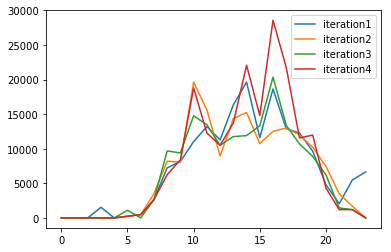

In [7]:
sns.lineplot(data=-generation-regup+regdown+demand,dashes=False)


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
data_name2='iteration52_version4_regupregdown20'
vehCap=pd.read_csv('../data/vehicle/VehiclesCap_'+data_name2+'.csv',header=0)
vehCap

In [ ]:
import matplotlib.pyplot as plt
sns.color_palette("Set2")
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=regdownRev,dashes=False)
plt.title('regdownRev')

In [ ]:
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=demandCost,dashes=False)
plt.title('demandCost')

In [ ]:
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=regupRev,dashes=False)
plt.title('regupRev')

In [ ]:
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=generationRev,dashes=False)
plt.title('generationReb')

In [ ]:
generationRev

In [ ]:
regupRev

In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=regdownRev,dashes=False)
plt.title('regdownRev')


sns.lineplot(data=demandCost,dashes=False)
plt.title('demandCost')
# plt.show()

sns.lineplot(data=regupRev,dashes=False)
plt.title('regupRev')
# plt.show()

sns.lineplot(data=generationRev,dashes=False)
plt.title('generationRev')
plt.show()

In [ ]:
demandCost=np.asarray(demand['iteration1']*pr['pr_e']).sum()
np.append(demandCost,demandCost)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
# sns.color_palette("Set2")
sns.color_palette("Paired")
plt.title('demand')
sns.lineplot(data=demand,dashes=False).get_figure().savefig("output.png")

# plot.get_figure().savefig("output.png")


In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=generation,dashes=False)
plt.title('generation')

In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=regup[1:],dashes=False)
plt.title('regup')
regup

In [ ]:

regup.drop(columns=['iteration1'])

In [ ]:
sns.set()
sns.set_style("whitegrid")
sns.lineplot(data=regdown,dashes=False)
plt.title('regdown')

In [ ]:
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

    y=
    x=demand.index
    plt.plot(x, y)
    plt.legend('12345', ncol=2, loc='upper left')

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns

data_name='iteration1_version3_regupregdown20'
myresult=pd.read_csv('../data/vehicle/VehiclesCap_V2G_'+data_name+'.csv',header=0)
N = 6# from 10mins to 1 hour
myresult=myresult.groupby(myresult.index // N).sum()/6# from the unit of W to kW
myresult=myresult.rename(columns={'EnergyDemand':'netload','EnergyGeneration':'gen_capacity_veh','Regup':'regup_capacity_veh','Regdown':'regdown_capacity_veh'})
myresult

In [ ]:
sns.relplot(
    data=myresult,
    # x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
